In [1]:
import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Obtenez l'ensemble de données sur le logement en Californie
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing; # est téléchargé sous forme de dictionnaire

In [4]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 5. Améliorer les prédictions du modèle grâce à l'expérimentation (réglage des hyperparamètres)

Les premières prédictions que vous effectuez avec un modèle sont généralement appelées **prédictions de base**.

Il en va de même pour les premières mesures d’évaluation que vous obtenez. Celles-ci sont généralement appelées **métriques de base**.

Votre prochain objectif est d'améliorer ces mesures de base.

Comment?

*Expérimentez, expérimentez, expérimentez !*

Deux des principales méthodes pour améliorer les mesures de base sont :
1. Du point de vue des données.
2. Du point de vue du modèle.

Du point de vue des données, la question suivante :
* Pourrions-nous collecter plus de données ? En apprentissage automatique, il est généralement préférable d’avoir plus de données, car cela donne à un modèle plus de possibilités d’apprendre des modèles.
* Pourrions-nous améliorer nos données ? Cela pourrait impliquer de combler des valeurs manquantes ou de trouver une meilleure stratégie d'encodage (transformer les données en chiffres).

Du point de vue du modèle, demande :
* Existe-t-il un meilleur modèle que nous pourrions utiliser ? Si vous avez commencé avec un modèle simple, pourriez-vous en utiliser un plus complexe ? (nous en avons vu un exemple en regardant la [carte d'apprentissage automatique Scikit-Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), les méthodes d'ensemble sont généralement considérées comme des modèles plus complexes)
* Pourrions-nous améliorer le modèle actuel ? Si le modèle que vous utilisez fonctionne bien dès la sortie de la boîte, les hyperparamètres peuvent-ils être ajustés pour le rendre encore meilleur ?

> **Remarque :** Les modèles dans les données sont également souvent appelés paramètres de données. La différence entre les *paramètres* et les *hyperparamètres* est qu'un modèle d'apprentissage automatique cherche lui-même à trouver des paramètres dans les données, alors que les hyperparamètres sont des paramètres sur un modèle qu'une personne (vous) peut ajuster.

Puisque nous disposons de deux ensembles de données existants, nous chercherons à améliorer nos résultats du point de vue du modèle.

Plus précisément, nous verrons comment nous pourrions améliorer nos modèles `RandomForestClassifier` et `RandomForestRegressor` grâce au réglage des hyperparamètres.

Que sont les hyperparamètres ?

Bonne question, vérifions-les.

Tout d'abord, nous allons instancier un `RandomForestClassifier`.

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

Lorsque nous instancions un modèle comme ci-dessus, nous utilisons les hyperparamètres par défaut.

Ceux-ci sont imprimés lorsque vous appelez l'instance de modèle et `get_params()`.

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Vous verrez des choses comme `max_degree`, `min_samples_split`, `n_estimators`.

Chacun d'entre eux est un hyperparamètre du « RandomForestClassifier » que vous pouvez ajuster.

Vous pouvez considérer les hyperparamètres comme étant similaires aux cadrans d’un four.

Avec le réglage par défaut, votre four peut faire un bon travail en cuisinant votre plat préféré. Mais avec un peu d’expérimentation, vous constaterez que les résultats sont meilleurs lorsque vous ajustez les paramètres.

<img src="../docs/images/sklearn-hyperparameter-tuning-oven.png" width=500/>

Il en va de même pour l’amélioration d’un modèle d’apprentissage automatique par réglage d’hyperparamètres.

Les hyperparamètres par défaut d'un modèle d'apprentissage automatique peuvent bien trouver des modèles dans les données. Mais il est possible qu'un ajustement des hyperparamètres améliore les performances d'un modèle.

Chaque modèle d'apprentissage automatique aura différents hyperparamètres que vous pourrez régler.

Vous vous demandez peut-être : « Comment puis-je me souvenir de tout cela ? »

Une autre bonne question.

C'est pourquoi nous nous concentrons sur Random Forest.

Au lieu de mémoriser tous les hyperparamètres de chaque modèle, nous verrons comment procéder avec un seul.

Et puis connaissant ces principes, vous pouvez les appliquer à un modèle différent si nécessaire.

En lisant la [documentation Scikit-Learn pour Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), vous constaterez qu'ils suggèrent d'essayer de changer `n_estimators` (le nombre d'arbres dans la forêt) et `min_samples_split` (le nombre minimum d'échantillons requis pour diviser un nœud interne).

Nous allons essayer de les régler ainsi que :
* `max_features` (le nombre de fonctionnalités à prendre en compte lors de la recherche du meilleur partage)
* `max_degree` (la profondeur maximale de l'arbre)
* `min_samples_leaf` (le nombre minimum d'échantillons requis pour être sur un nœud feuille)

Si cela semble encore beaucoup, la bonne nouvelle est que le processus que nous suivons avec Random Forest et ajustons ses hyperparamètres peut être utilisé pour d'autres modèles d'apprentissage automatique dans Scikit-Learn. La seule différence est qu'avec un modèle différent, les hyperparamètres que vous réglez seront différents.

L'ajustement des hyperparamètres est généralement un processus expérimental pour déterminer lesquels sont les meilleurs. Car il n’existe aucun moyen réel de savoir quels hyperparamètres seront les meilleurs au début.

Pour nous familiariser avec le réglage des hyparamètres, nous prendrons notre RandomForestClassifier et ajusterons ses hyperparamètres de 3 manières.

1. À la main
2. Au hasard avec [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
3. De manière exhaustive avec [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### 5.1 Réglage manuel des hyperparamètres

Jusqu'à présent, nous avons travaillé avec des ensembles de données de formation et de test.

Vous entraînez un modèle sur un ensemble d’entraînement et l’évaluez sur un ensemble de données de test.

Mais le réglage des hyperparamètres introduit un troisième ensemble, un ensemble de validation.

Le processus devient maintenant :
1. Entraînez un modèle sur les données d'entraînement.
2. (Essayez d') améliorer les hyperparamètres du modèle sur l'ensemble de validation.
3. Évaluez le modèle sur l'ensemble de test.

Si notre ensemble de données de départ contenait 100 étiquettes de dossiers de patients différents indiquant qui souffrait d'une maladie cardiaque et qui n'en souffrait pas et que nous souhaitions créer un modèle d'apprentissage automatique pour prédire qui souffrait d'une maladie cardiaque et qui n'en souffrait pas, cela pourrait ressembler à ceci :

<img src="../docs/images/sklearn-train-valid-test-annotated.png" width=500/>

Puisque nous savons que nous utilisons un `RandomForestClassifier` et que nous connaissons les hyperparamètres que nous voulons ajuster, voyons à quoi cela ressemble.

Tout d’abord, rappelons les paramètres de base.

In [7]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Et nous allons ajuster :
* `max_profondeur`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimateurs`

Nous utiliserons le même code que précédemment, sauf que cette fois nous créerons une répartition formation, validation et test.

Avec l'ensemble d'entraînement contenant 70 % des données et les ensembles de validation et de test contenant chacun 15 %.

Obtenons quelques résultats de base, puis nous ajusterons le modèle.

Et puisque nous allons évaluer quelques modèles, créons une fonction d'évaluation.

In [8]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

Recréons maintenant un workflow précédent, sauf que nous ajouterons la création d'un ensemble de validation.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Définir la graine
np.random.seed(42)

# Lire les données
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Divisé en X (features) & y (labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Répartition formation et tests (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Créer une validation et une répartition des tests en divisant les données de test en deux (30 % de test -> 15 % de validation, 15 % de test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Faites des prédictions
y_preds = clf.predict(X_valid)

# Evaluez le classificateur
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [10]:
# Vérifiez les tailles des divisions
print(f"Training data: {len(X_train)} samples, {len(y_train)} labels")
print(f"Validation data: {len(X_valid)} samples, {len(y_valid)} labels")
print(f"Testing data: {len(X_test)} samples, {len(y_test)} labels")

Training data: 212 samples, 212 labels
Validation data: 45 samples, 45 labels
Testing data: 46 samples, 46 labels


Magnifique, essayons maintenant d'améliorer les résultats.

Nous allons changer 1 des hyperparamètres, `n_estimators=100` (par défaut) en `n_estimators=200` et voir si cela améliore l'ensemble de validation.

In [11]:
np.random.seed(42)

# Créer un deuxième classificateur
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Faites des prédictions
y_preds_2 = clf_2.predict(X_valid)

# Évaluer le 2ème classificateur
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


Hmm, il semble que doubler la valeur de « n_estimators » soit *pire* que la valeur par défaut, peut-être y a-t-il une meilleure valeur pour « n_estimators » ?

Et quels autres hyperparamètres pourrions-nous modifier ?

Attendez...

Cela pourrait prendre un certain temps si nous ne faisons que créer de nouveaux modèles avec de nouveaux hyperparamètres à chaque fois.

Il existe sûrement un meilleur moyen ?

Il y a.

### 5.2 Réglage des hyperparamètres avec [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) de Scikit-Learn nous permet de rechercher aléatoirement différents hyperparamètres pour voir lesquels fonctionnent le mieux. .

Il stocke également des détails sur ceux qui fonctionnent le mieux !

Voyons-le en action.

Tout d’abord, nous créons un dictionnaire de distributions de paramètres (collections de différentes valeurs pour des hyperparamètres spécifiques) que nous aimerions parcourir.

Ce dictionnaire se présente sous la forme :

```python
param_distributions = {"hyperparameter_name": [values_to_randomly_try]}
```

Où `"hyperparameter_name"` est la valeur d'un hyperparamètre spécifique pour un modèle et `[values_to_randomly_try]` est une liste de valeurs pour cet hyperparamètre spécifique à essayer de manière aléatoire.

In [12]:
# Grille d'hyperparamètres RandomizedSearchCV recherchera
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

D’où viennent ces valeurs ?

Ils sont inventés.

Composé?

Oui.

Pas complètement sorti de l'air, mais après avoir lu la [documentation Scikit-Learn sur Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), vous en verrez de ces valeurs ont certaines valeurs qui fonctionnent généralement bien et certains hyperparamètres acceptent des chaînes plutôt que des entiers.

Maintenant que nous avons la configuration du dictionnaire de distribution des paramètres, « RandomizedSearchCV » de Scikit-Learn l'examinera, choisira une valeur aléatoire parmi chacune, instanciera un modèle avec ces valeurs et testera chaque modèle.

Combien de modèles va-t-il tester ?

Autant qu’il y en a pour chaque combinaison d’hyperparamètres à tester. Additionnons-les.

In [13]:
# Comptez le nombre total de combinaisons d'hyperparamètres à tester
total_randomized_hyperparameter_combintions_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combintions_to_test} potential combinations of hyperparameters to test.")

There are 1440 potential combinations of hyperparameters to test.


Cela fait beaucoup de combinaisons !

Ou...

Nous pouvons définir le paramètre `n_iter` pour limiter le nombre de tests de modèles `RandomizedSearchCV` (par exemple, `n_iter=20` signifie essayer `20` combinaisons aléatoires différentes d'hyperparamètres et validera de manière croisée chaque ensemble, donc si `cv=5 `, 5x20 = 100 ajustements au total).

La meilleure chose?

Les résultats que nous obtiendrons seront validés de manière croisée (d'où le CV dans `RandomizedSearchCV`) afin que nous puissions utiliser `train_test_split()`.

Et comme nous examinons tant de modèles différents, nous définirons `n_jobs=-1` dans notre [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble. RandomForestClassifier.html) afin que Scikit-Learn profite de tous les cœurs (processeurs) de nos ordinateurs.

Voyons-le en action.

> **Remarque :** En fonction de `n_iter` (le nombre de modèles que vous testez), des différentes valeurs de la grille d'hyperparamètres et de la puissance de votre ordinateur, l'exécution de la cellule ci-dessous peut prendre un certain temps.

In [14]:
# Démarrer le chronomètre
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Divisez en X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Divisez en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Définissez n_jobs sur -1 pour utiliser tous les cœurs disponibles sur votre machine (si cela provoque des erreurs, essayez n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Configurer RandomizedSearchCV
n_iter = 30 # essayez 30 modèles
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # affiche les résultats

# Ajuster la version RandomizedSearchCV de clf (effectue une validation croisée pour nous, donc pas besoin d'utiliser un jeu de validation)rs_clf.fit(X_train, y_train);
rs_clf.fit(X_train, y_train);

# Arrétez le chronomètre
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=sq

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=8, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=8, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=8, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=8, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=8, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_featur

Lorsque `RandomizedSearchCV` parcourt les combinaisons `n_iter` d'espace de recherche d'hyperparamètres, il stocke les meilleures dans l'attribut `best_params_`.

In [15]:
# Trouvez les meilleurs hyperparamètres trouvés par RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

Désormais, lorsque nous appellerons `predict()` sur `rs_clf` (notre version `RandomizedSearchCV` de notre classificateur), il utilisera les meilleurs hyperparamètres qu'il a trouvés.

In [16]:
# Faites des prédictions avec les meilleurs hyperparamètres
rs_y_preds = rs_clf.predict(X_test)

# Évaluez les prédictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


Grâce au test de « RandomizedSearchCV » sur un tas d'hyperparamètres différents, nous obtenons un bon coup de pouce à toutes les métriques d'évaluation de notre modèle de classification.

### 5.3 Réglage des hyperparamètres avec [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Il existe une autre façon dont nous pourrions essayer d’améliorer les hyperparamètres de notre modèle.

Et c'est avec [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

La principale différence entre `GridSearchCV` et `RandomizedSearchCV` est que `GridSearchCV` recherche de manière exhaustive sur une grille d'hyperparamètres (il essaiera toutes les combinaisons possibles), tandis que `RandomizedSearchCV` recherche sur une grille d'hyperparamètres de manière aléatoire (en s'arrêtant après `n_iter` combinaisons).

`GridSearchCV` fait également référence à un dictionnaire de distributions de paramètres sous forme de grille de paramètres (via le paramètre `param_grid`).

Par exemple, regardons notre dictionnaire des hyperparamètres.

In [17]:
param_distributions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

`RandomizedSearchCV` essaie des combinaisons `n_iter` de différentes valeurs.

Alors que `GridSearchCV` essaiera toutes les combinaisons possibles.

Et si vous vous souvenez de l'époque où nous avons fait le calcul : `max_degree` a 4 valeurs, `max_features` en a 2, `min_samples_leaf` en a 3, `min_samples_split` en a 3, `n_estimators` en a 5.

Cela fait 4x2x3x3x5 = 360 modèles !

Cela peut prendre beaucoup de temps en fonction de la puissance de l'ordinateur que vous utilisez, de la quantité de données dont vous disposez et de la complexité des hyperparamètres (généralement des valeurs plus élevées signifient un modèle plus complexe).

Dans notre cas, les données que nous utilisons sont relativement petites (seulement environ 300 échantillons).

Puisque nous avons déjà essayé de trouver des hyperparamètres idéaux en utilisant `RandomizedSearchCV`, nous allons créer une autre grille d'hyperparamètres basée sur les `best_params_` de `rs_clf` avec moins d'options, puis essayer d'utiliser `GridSearchCV` pour trouver un ensemble plus idéal. .

Essentiellement, le flux de travail pourrait être :
1. Ajustez les hyperparamètres à la main pour avoir une idée des données/du modèle.
2. Créez un large ensemble de distributions d'hyperparamètres et recherchez-les de manière aléatoire avec `RandomizedSearchCV`.
3. Trouvez les meilleurs hyperparamètres à partir de 2 et réduisez l'espace de recherche avant de rechercher de manière exhaustive un sous-ensemble plus petit avec `GridSearchCV`.

> **Remarque :** Basé sur `best_params_` de `rs_clf`, cela implique que le prochain ensemble d'hyperparamètres que nous allons essayer se situe à peu près dans la même plage que le meilleur ensemble trouvé par `RandomizedSearchCV`.

In [18]:
# Créer une grille d'hyperparamètres similaire à rs_clf.best_params_
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}

Nous avons créé une autre grille d'hyperparamètres sur lesquels effectuer la recherche, cette fois avec un total inférieur.

In [19]:
# Comptez le nombre total de combinaisons d'hyperparamètres à tester
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} combinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combintions_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
 than before (previous: {total_randomized_hyperparameter_combintions_to_test}).")

There are 24 combinations of hyperparameters to test.
This is 60.0 times less than before (previous: 1440).


Maintenant, lorsque nous exécutons `GridSearchCV`, en lui transmettant notre classificateur (`clf`), la grille de paramètres (`param_grid`) et le nombre de plis de validation croisée que nous aimerions utiliser (`cv=5`), cela va créez un modèle avec chaque combinaison d'hyperparamètres, puis effectuez une validation croisée toutes les 5 fois (par exemple, 36 combinaisons d'hyperparamètres * 5 = 135 ajustements au total) et vérifiez les résultats.

> **Remarque :** En fonction de la puissance de calcul de la machine que vous utilisez, l'exécution de la cellule suivante peut prendre quelques minutes.

In [20]:
# Démarrer le chronomètre
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Divisez en X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Divisé en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Définissez n_jobs sur -1 pour utiliser tous les cœurs de machine disponibles (si cela produit des erreurs, essayez n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Configurer GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # affichez la progression

# Ajuster la version RandomizedSearchCV de clf
gs_clf.fit(X_train, y_train);

# Trouver le temps d'exécution
end_time = time.time()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END max_depth=40, max_features=l

In [21]:
# Combien de temps at-il fallu?
total_time = end_time - start_time
print(f"[INFO] The total running time for running GridSearchCV was {total_time:.2f} seconds.")

[INFO] The total running time for running GridSearchCV was 148.36 seconds.


Une fois terminé, nous pouvons vérifier les meilleures combinaisons d'hyperparamètres trouvées en utilisant l'attribut `best_params_`.

In [22]:
# Vérifiez les meilleurs hyperparamètres trouvés avec GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

Et par défaut, lorsque nous appellerons la fonction `predict()` sur `gs_clf`, elle utilisera les meilleurs hyperparamètres.

In [23]:
# Prédictions maximales avec le classificateur GridSearchCV
gs_y_preds = gs_clf.predict(X_test)

# Évaluez les prédictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

Créons un DataFrame pour comparer les différentes métriques.

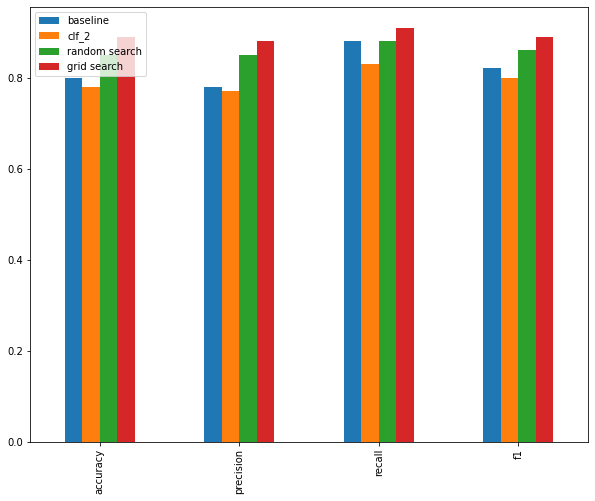

In [24]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

Après avoir essayé de nombreuses combinaisons différentes d’hyperparamètres, nous obtenons une légère amélioration des résultats.

Cependant, vous remarquerez parfois que vos résultats ne changent pas beaucoup.

Ces choses pourraient arriver.

Mais il est important de se rappeler que ce n’est pas fini. Il y a d'autres choses que vous pouvez essayer.

Dans le sens du réglage des hyperparamètres, il pourrait y avoir un meilleur ensemble que nous pourrions trouver grâce à une recherche plus approfondie avec `RandomizedSearchCV` et `GridSearchCV`, cela nécessiterait plus d'expérimentation.

Autres techniques que vous pourriez :
* **Collecter davantage de données** - D'après les résultats obtenus actuellement par nos modèles, il semble qu'ils soient très capables de trouver des modèles. La collecte de davantage de données peut améliorer la capacité d'un modèle à trouver des modèles. Cependant, votre capacité à y parvenir dépendra largement du projet sur lequel vous travaillez.
* **Essayez un modèle plus avancé** - Bien que notre modèle Random Forest optimisé fonctionne plutôt bien, une méthode d'ensemble plus avancée telle que [XGBoost](https://xgboost.ai/) ou [CatBoost](https:/ /catboost.ai/) pourrait mieux fonctionner. Je vais les laisser pour les activités extra-scolaires.

Étant donné que l’apprentissage automatique relève à la fois de l’ingénierie et de la science, ce type d’expériences est courant dans tout projet d’apprentissage automatique.

Maintenant que nous avons un modèle de forêt aléatoire optimisé, découvrons comment nous pouvons le sauvegarder et l'exporter afin de pouvoir le partager avec d'autres ou potentiellement l'utiliser dans une application externe.

## 6. Sauvegarde et chargement de modèles d'apprentissage automatique formés

Notre modèle `GridSearchCV` (`gs_clf`) a les meilleurs résultats jusqu'à présent, nous allons l'exporter et l'enregistrer dans un fichier.

### 6.1 Sauvegarde et chargement d'un modèle avec `pickle`

Nous avons vu dès le début qu'une façon de sauvegarder un modèle consiste à utiliser le [module `pickle`](https://docs.python.org/3/library/pickle.html) de Python.

Nous allons utiliser la méthode `dump()` de `pickle` et lui transmettre notre modèle, `gs_clf`, ainsi que la fonction `open()` contenant une chaîne pour le nom de fichier sous lequel nous voulons enregistrer notre modèle, ainsi que la chaîne `"wb"` qui signifie "write binaire", qui est le type de fichier `open()` sous lequel notre modèle sera écrit.

In [25]:
import pickle

# Enregistrer un modèle existant dans un fichier
best_model_file_name_pickle = "gs_random_forest_model_1.pkl" # L'extension .pkl signifie "pickle"
pickle.dump(gs_clf, open(best_model_file_name_pickle, "wb"))

Une fois enregistré, nous pouvons l'importer en utilisant la fonction `load()` de `pickle`, en lui passant `open()` contenant le nom du fichier sous forme de chaîne et `"rb"` signifiant "lire binaire".

In [26]:
# Chargez un modèle enregistré
loaded_pickle_model = pickle.load(open(best_model_file_name_pickle, "rb"))

Une fois que vous avez réimporté votre modèle entraîné à l'aide de « pickle », vous pouvez l'utiliser pour faire des prédictions comme d'habitude.

In [27]:
# Faire des prédictions et évaluer le modèle chargé
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

Vous remarquerez que les métriques d'évaluation du modèle réimporté sont les mêmes que celles du modèle avant son exportation.

In [28]:
loaded_pickle_model_metrics == gs_metrics

True

### 6.2 Sauvegarde et chargement d'un modèle avec [`joblib`](https://joblib.readthedocs.io/en/latest/persistence.html)

L'autre façon de charger et de sauvegarder des modèles est d'utiliser `joblib`. Ce qui fonctionne relativement de la même manière que « cornichon ».

Pour enregistrer un modèle, nous pouvons utiliser la fonction `dump()` de `joblib`, en lui passant le modèle (`gs_clf`) et le nom de fichier souhaité.

In [29]:
from joblib import dump, load

# Enregistrer un modèle dans un fichier
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib) 

['gs_random_forest_model_1.joblib']

Une fois que vous avez enregistré un modèle en utilisant `dump()`, vous pouvez l'importer en utilisant `load()` et lui transmettre le nom de fichier du modèle.

In [30]:
# Importer un modèle joblib enregistré
loaded_joblib_model = load(filename=best_model_file_name_joblib)

Encore une fois, une fois importé, nous pouvons faire des prédictions avec notre modèle.

In [31]:
# Faire et évaluer des prédictions joblib
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

Et encore une fois, vous remarquerez que les mesures d’évaluation sont les mêmes qu’auparavant.

In [32]:
loaded_joblib_model_metrics == gs_metrics

True

Alors, lequel devriez-vous utiliser, « pickle » ou « joblib » ?

Selon la [documentation sur la persistance des modèles de Scikit-Learn](https://scikit-learn.org/stable/model_persistence.html), ils suggèrent qu'il pourrait être plus efficace d'utiliser `joblib` car il est plus efficace avec de grands tableaux numpy (qui est ce qui peut être contenu dans les modèles Scikit-Learn entraînés/ajustés).

## 7. Revisiter l'ensemble du pipeline

Nous avons couvert beaucoup de choses. Et jusqu’à présent, cela semble être partout, ce qui est le cas.

Mais ne vous inquiétez pas, les projets de machine learning commencent souvent ainsi.

Tout un tas d'expérimentations et de code partout au début, puis une fois que vous avez trouvé quelque chose qui fonctionne, le processus de raffinement commence.

À quoi ressemblerait ce processus de raffinement ?

Nous utiliserons comme exemple le problème de régression des ventes de voitures (prédire le prix de vente des voitures).

Pour ranger les choses, nous utiliserons la classe [`sklearn.pipeline.Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) de Scikit-Learn.

Vous pouvez imaginer « Pipeline » comme étant un moyen d'enchaîner un certain nombre de processus Scikit-Learn différents.

### 7.1 Création d'une régression [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
Vous vous souviendrez peut-être de l'époque où, dans la section 2 : Préparer les données, nous avons traité des données sur les ventes de voitures, pour construire un modèle de régression sur celles-ci, nous avons dû coder les caractéristiques catégorielles en nombres et remplir les données manquantes.

Le code que nous avons utilisé fonctionnait, mais il était un peu partout.

La bonne nouvelle est que « Pipeline » peut nous aider à le nettoyer.

Rappelons à quoi ressemblent les données.

In [33]:
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [35]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Il y a 1 000 lignes, trois caractéristiques sont catégorielles (« Marque », « Couleur », « Portes »), les deux autres sont numériques (« Odomètre (KM) », « Prix ») et il y a 249 valeurs manquantes.

Nous allons devoir transformer les caractéristiques catégorielles en nombres et remplir les valeurs manquantes avant de pouvoir ajuster un modèle.

Nous allons construire un « Pipeline » pour ce faire.

Le paramètre d'entrée principal de `Pipeline` est `steps` qui est une liste de tuples (`[(step_name, action_to_take)]`) du nom de l'étape, plus l'action que vous souhaitez qu'elle effectue.

Dans notre cas, vous pourriez considérer les étapes comme suit :
1. Remplissez les données manquantes
2. Convertissez les données en nombres
3. Construire un modèle sur les données

Faisons-le!

In [36]:
# Préparer les données
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# La modélisation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Configurer une graine aléatoire
import numpy as np
np.random.seed(42)

# Importez des données et supprimez les lignes avec des étiquettes manquantes
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Définir différentes fonctionnalités et pipelines de transformateur
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Configurer les étapes de prétraitement (remplir les valeurs manquantes, puis convertir en nombres)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Créer un pipeline de prétraitement et de modélisation
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Fractionner les données
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ajuster et marquer le modèle
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

Ce que nous avons fait, c'est combiner une série d'étapes de prétraitement des données (remplissage des valeurs manquantes, codage des valeurs numériques) ainsi qu'un modèle dans un « Pipeline ».

Cela nettoie non seulement le code, mais garantit également que les mêmes étapes sont suivies à chaque fois que le code est exécuté plutôt que d'avoir plusieurs étapes de traitement différentes à différentes étapes.

Il est également possible d'utiliser `GridSearchCV` ou `RandomizedSearchCV` avec un `Pipeline`.

La principale différence est que lors de la création d'une grille d'hyperparamètres, vous devez ajouter un préfixe à chaque hyperparamètre (voir la [documentation pour `RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble. RandomForestRegressor.html) pour une liste complète des hyperparamètres possibles à régler).

Le préfixe est le nom de l'étape `Pipeline` que vous souhaitez modifier, suivi de deux traits de soulignement.

Par exemple, pour ajuster les `n_estimators` de `"model"` dans le `Pipeline`, vous utiliseriez : `"model__n_estimators"` (notez le double trait de soulignement après `model__` au début).

Voyons ça!

> **Remarque :** En fonction de la puissance de traitement de votre ordinateur, l'exécution de la cellule ci-dessous peut prendre quelques minutes.

In [37]:
# Utilisation de la recherche par grille avec pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # notez le double trait de soulignement après chaque préfixe "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

Trouvons maintenant le score de notre modèle (par défaut `GridSearchCV` enregistre le meilleur modèle dans l'objet `gs_model`).

In [38]:
# Notez le meilleur modèle
gs_model.score(X_test, y_test)

0.2848784564026805

En utilisant `GridSearchCV`, nous constatons une belle augmentation du score de nos modèles.

Et le meilleur, c'est que, comme tout est dans un « Pipeline », nous pourrions facilement reproduire ces résultats.